Importing the required libraries.

A wake word is a phrase that causes a smart device to begin recording an end user's request so it can be sent to the cloud for processing. When a smart device detects its wake word, it records the next spoken request and sends a recording of the user's request to cloud. Smart devices in the cloud process the user's request and send back a response or initiate an action.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa
import librosa.display
import os
import warnings
import IPython.display as ipd
warnings.filterwarnings('ignore')

In [0]:
folder = os.listdir('wake-word-benchmark/audio')
folder

['alexa', 'computer', 'jarvis', 'smart mirror', 'snowboy', 'view glass']

In [0]:

ipd.Audio('wake-word-benchmark/audio/alexa/1.flac')

In [0]:
y=[]
temp = []
data =[]
for i in folder:
    file=os.listdir('wake-word-benchmark/audio/'+i)
    for j in file:
        y.append(i)
        x , sr = librosa.load('wake-word-benchmark/audio/'+i+'/'+j)
        data.append(x)
    temp.append((librosa.load('wake-word-benchmark/audio/'+i+'/'+j)))

Text(0.5, 1.0, 'view glass')

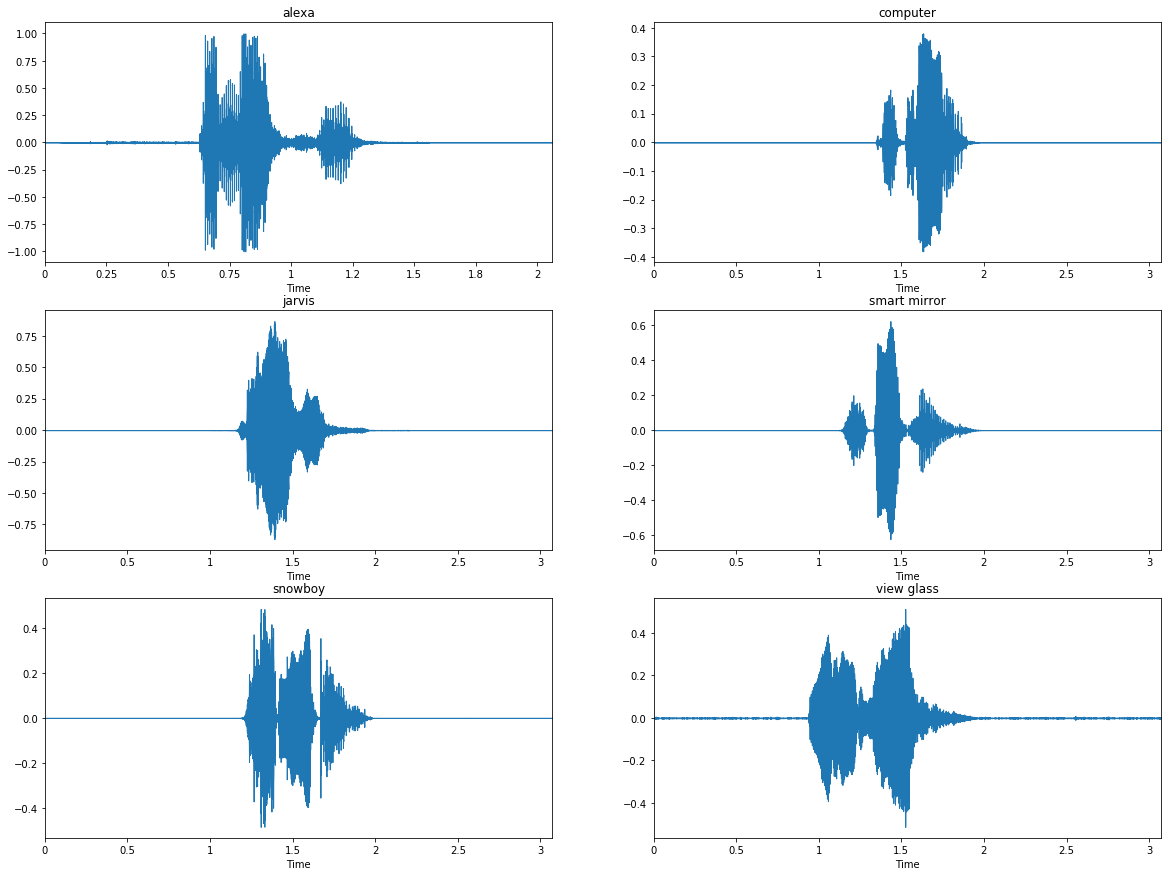

In [0]:
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
librosa.display.waveplot(temp[0][0] , sr = temp[0][1])
plt.title(folder[0])
plt.subplot(3,2,2)
librosa.display.waveplot(temp[1][0] , sr = temp[1][1])
plt.title(folder[1])
plt.subplot(3,2,3)
librosa.display.waveplot(temp[2][0] , sr = temp[2][1])
plt.title(folder[2])
plt.subplot(3,2,4)
librosa.display.waveplot(temp[3][0] , sr = temp[3][1])
plt.title(folder[3])
plt.subplot(3,2,5)
librosa.display.waveplot(temp[4][0] , sr = temp[4][1])
plt.title(folder[4])
plt.subplot(3,2,6)
librosa.display.waveplot(temp[5][0] , sr = temp[5][1])
plt.title(folder[5])

In [0]:
Xstft=[]
Xmfcc = []
for i in range(len(data)):
  Xstft.append(np.abs(librosa.stft(data[i]).mean(axis = 1).T))
Xstft=np.array(Xstft)
Xstft.shape

(2293, 1025)

Text(0.5, 1.0, 'view glass')

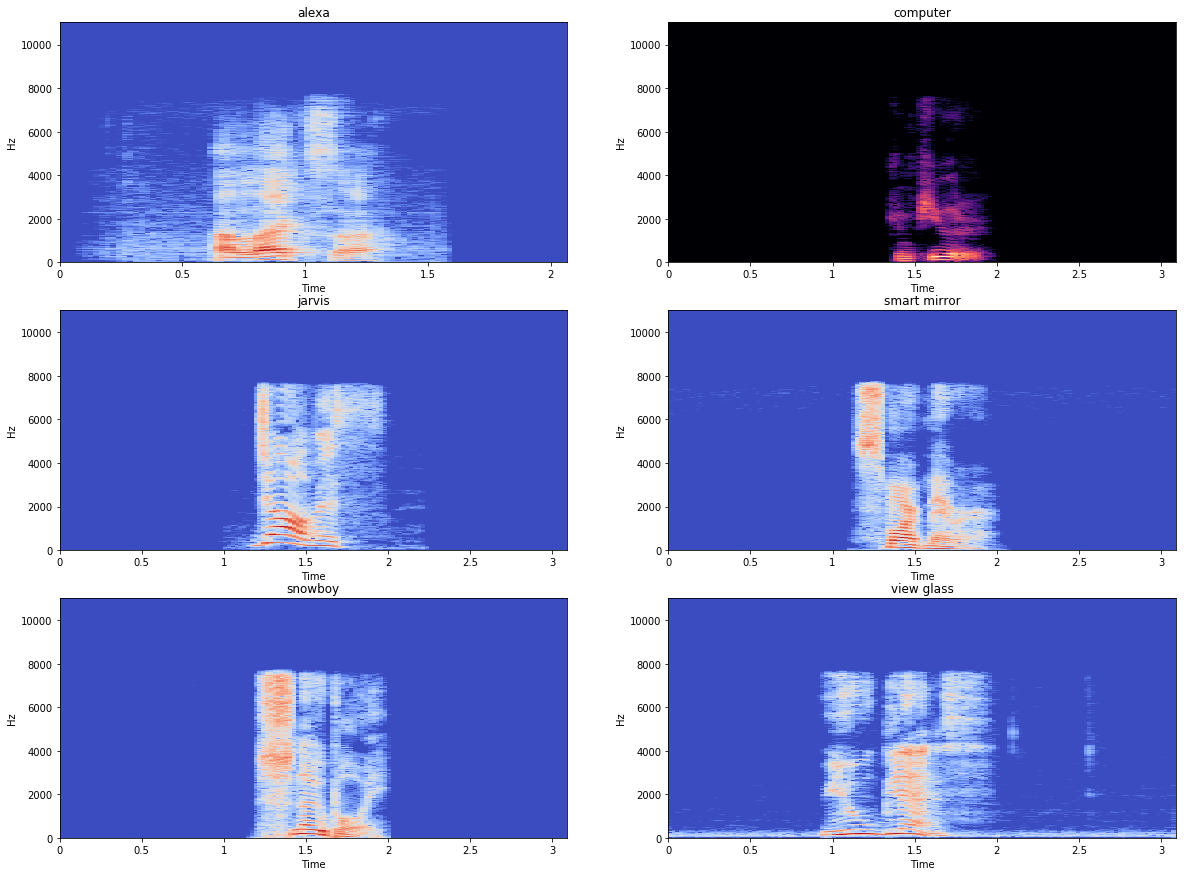

In [0]:
plt.figure(figsize=(20, 15))
plt.subplot(3,2,1)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(temp[0][0]))), sr=temp[0][1], x_axis='time', y_axis='hz')
plt.title(folder[0])
plt.subplot(3,2,2)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(temp[1][0]))), sr=temp[1][1], x_axis='time', y_axis='hz')
plt.title(folder[1])
plt.subplot(3,2,3)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(temp[2][0]))), sr=temp[2][1], x_axis='time', y_axis='hz')
plt.title(folder[2])
plt.subplot(3,2,4)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(temp[3][0]))), sr=temp[3][1], x_axis='time', y_axis='hz')
plt.title(folder[3])
plt.subplot(3,2,5)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(temp[4][0]))), sr=temp[4][1], x_axis='time', y_axis='hz')
plt.title(folder[4])
plt.subplot(3,2,6)
librosa.display.specshow(librosa.amplitude_to_db(abs(librosa.stft(temp[5][0]))), sr=temp[5][1], x_axis='time', y_axis='hz')
plt.title(folder[5])

In [0]:
Y = pd.get_dummies(y)
Y.head()

,alexa,computer,jarvis,smart mirror,snowboy,view glass
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xstft, Y, test_size=0.4)

## Neural Network

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates. Neural networks can adapt to changing input; so the network generates the best possible result without needing to redesign the output criteria

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers


model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1025))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs = 25, batch_size = 128, verbose=1,validation_data=(X_test,y_test),shuffle=True)


score = model.evaluate(X_test, y_test, batch_size=128)

Train on 1375 samples, validate on 918 samples
Epoch 1/25
1375/1375 [==============================] - 1s 616us/step - loss: 0.4468 - acc: 0.8333 - val_loss: 0.4372 - val_acc: 0.8333
Epoch 2/25
1375/1375 [==============================] - 0s 49us/step - loss: 0.4314 - acc: 0.8333 - val_loss: 0.4102 - val_acc: 0.8333
Epoch 3/25
1375/1375 [==============================] - 0s 53us/step - loss: 0.4079 - acc: 0.8353 - val_loss: 0.3739 - val_acc: 0.8404
Epoch 4/25
1375/1375 [==============================] - 0s 49us/step - loss: 0.3812 - acc: 0.8407 - val_loss: 0.3429 - val_acc: 0.8551
Epoch 5/25
1375/1375 [==============================] - 0s 54us/step - loss: 0.3632 - acc: 0.8487 - val_loss: 0.3216 - val_acc: 0.8676
Epoch 6/25
1375/1375 [==============================] - 0s 54us/step - loss: 0.3414 - acc: 0.8520 - val_loss: 0.3149 - val_acc: 0.8680
Epoch 7/25
1375/1375 [==============================] - 0s 52us/step - loss: 0.3253 - acc: 0.8581 - val_loss: 0.3003 - val_acc: 0.8787
Epoch 8

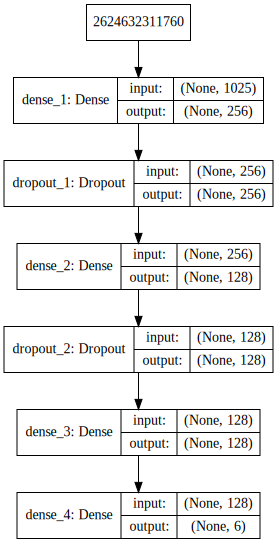

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

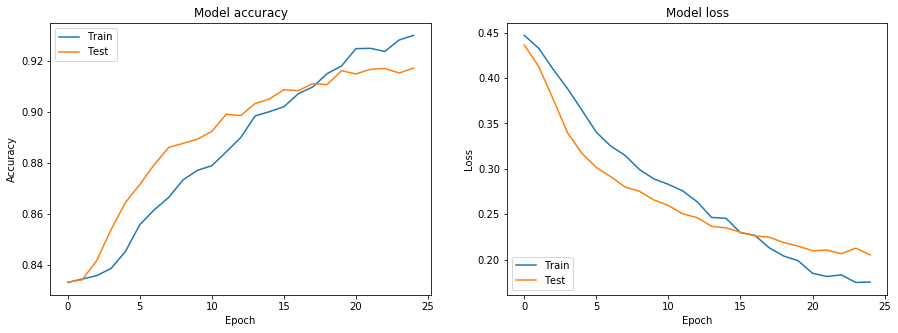

In [0]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower left')

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
yl=list(le.fit_transform(y))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(Xstft, yl, test_size=0.4)

 ## Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.5, max_features=3, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train)
print("Learning rate: ", 0.5)
print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test, y_test)))
    

Learning rate:  0.5
Accuracy score (training): 0.981
Accuracy score (validation): 0.715


## Logistic Regression

The logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

In [0]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=1000).fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.673202614379085

## CART

Classification and Regression Trees or CART for short is a term introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.
Classically, this algorithm is referred to as “decision trees”, but on some platforms like R they are referred to by the more modern term CART.
The CART algorithm provides a foundation for important algorithms like bagged decision trees, random forest and boosted decision trees.

In [0]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree = decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
accuracy_score(y_pred,y_test)

0.5915032679738562

## SVM

SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems and work well for many practical problems. The idea of SVM is simple: The algorithm creates a line or a hyperplane which separates the data into classes.

In [0]:
from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train) 
y_pred = clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.6470588235294118